In [9]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [10]:
alphap = 3
dir_data = "../../data/alpha3/"

In [11]:
import glob
files = glob.glob(dir_data+"fractal_dim_alpha_3*")
files

['../../data/alpha3/fractal_dim_alpha_3_p_0.25',
 '../../data/alpha3/fractal_dim_alpha_3_p_0.5',
 '../../data/alpha3/fractal_dim_alpha_3_p_0.75']

In [12]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

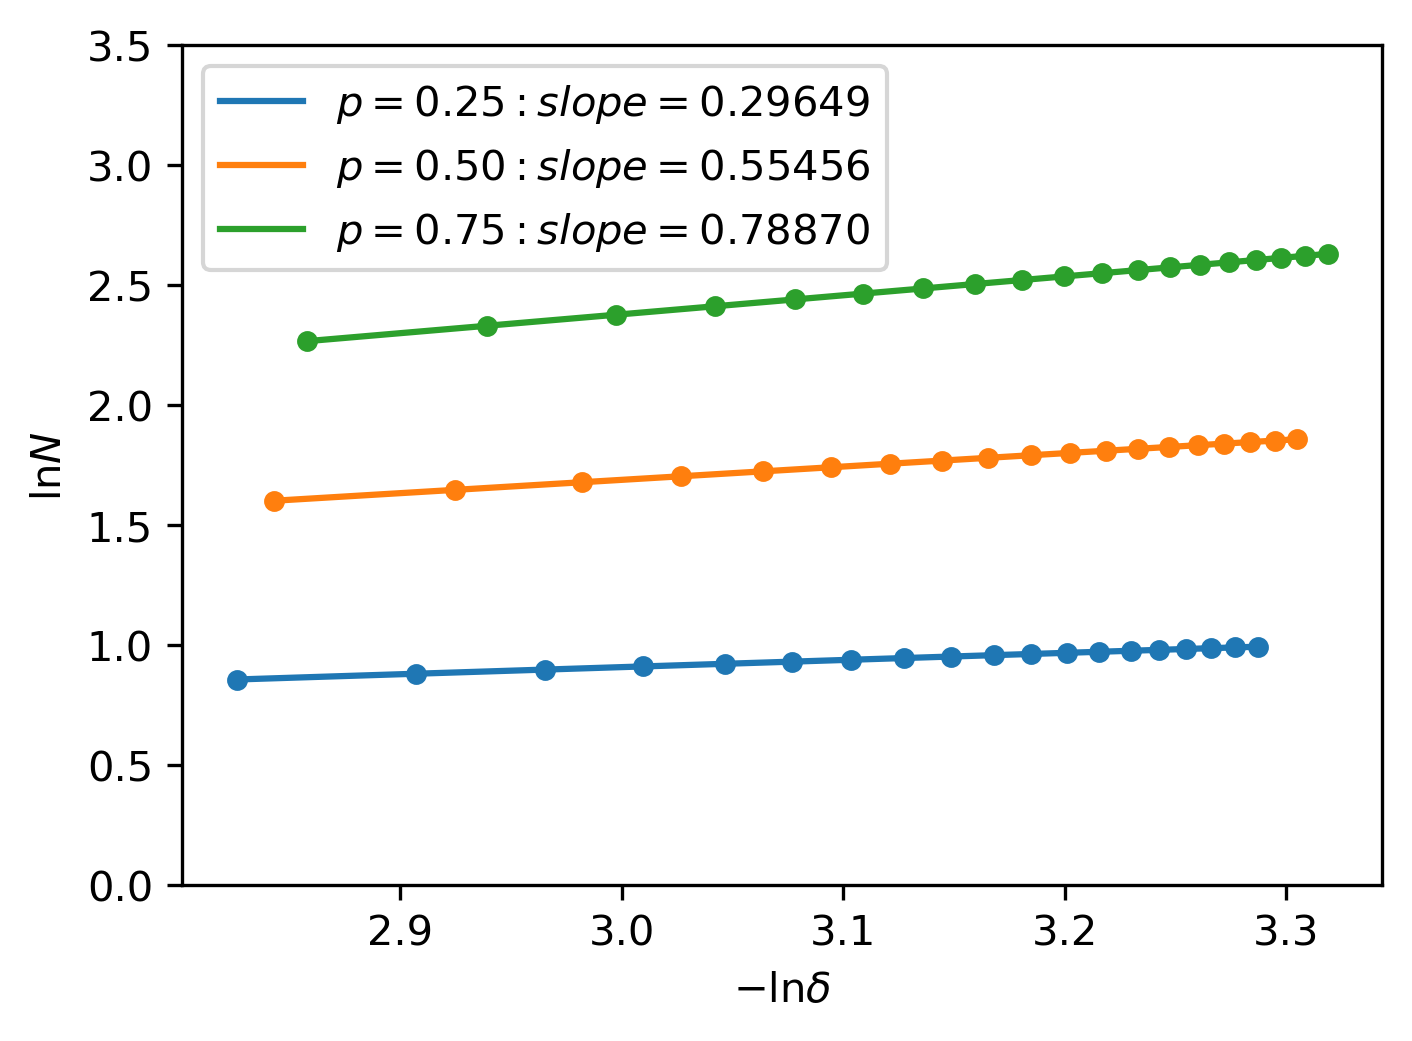

In [13]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)
percent_p = [25, 50, 75]
colors = ['tab:blue', 'tab:orange', 'tab:green']

k=0
for i in percent_p:
    for j in files:
        p_value = float(j.split("_")[-1])
        if int(p_value*100) == int(i):
            filename = j
    data = np.loadtxt(filename)
    t, N, M = data.T
    x, y, slope, intercept = convert_to_plot(N, M)
    p = i/100
    plt.plot(x, y,"o", markersize=4, color=colors[k])
    plt.plot(x, x*slope + intercept, label=r"$p={:.2f}: slope={:.5f}$".format(p, slope), color=colors[k])
    k += 1

plt.legend(loc=2)
plt.xlabel(r"$-\ln \delta$")
plt.ylabel(r"$\ln N$")
plt.ylim([0, 3.5])
axes.set_position([0.15, 0.15, 0.8, 0.8])
plt.savefig("fractal_dim_alpha_3.pdf")